# BINANCE STOCK PRICE PREDICTION

## Project Summary

## Business Understanding 

Binance is a leading cryptocurrency exchange and a major player in the digital asset space. Its stock prices or token values are influenced by a variety of factors such as market demand, news, regulations, and macroeconomic conditions. Accurate predictions can help users maximize returns and manage risks.

- Key Stakeholders:

Retail Traders and Investors: Seeking to optimize their trading strategies.
Institutional Investors: Using predictions to manage portfolios and hedge risks.
Binance Ecosystem Participants: Interested in understanding market trends.
Business Goals:

Enable informed trading by predicting short-term price movements.
Enhance investment decision-making through trend analysis.
Mitigate risks by identifying potential downturns in advance.
Technical Goals:

Develop a robust machine learning model that accurately predicts price movements.
Integrate relevant external data such as market sentiment, trading volumes, and news sentiment.
Value Proposition:
Providing an accurate and actionable predictive system improves confidence in decision-making, supports profitability for users, and strengthens Binance's position as a transparent and data-driven ecosystem.

- Metrics of Success:

Prediction Accuracy: High precision in predicting stock or token price changes.
Model Interpretability: Ease of understanding key drivers of predictions.
ROI Improvement: Demonstrated better returns or reduced risks for users.

### Objective


- To predict the future price movements of Binance's stock or cryptocurrency assets to empower investors and traders with data-driven insights for making informed decisions.


## Data preparation

In [1]:
# Loading the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
# loading the dataset
df = pd.read_csv("bnb.csv")

In [3]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2650 entries, 0 to 2649
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ticker  2650 non-null   object 
 1   date    2650 non-null   object 
 2   open    2650 non-null   float64
 3   high    2650 non-null   float64
 4   low     2650 non-null   float64
 5   close   2650 non-null   float64
dtypes: float64(4), object(2)
memory usage: 124.3+ KB


In [4]:
# Dataset Description
df.describe()

,open,high,low,close
count,2650.000000,2650.000000,2650.000000,2650.000000
mean,209.806639,215.701241,203.581398,210.064996
std,208.019553,213.546993,201.990237,208.179737
min,0.698600,0.716600,0.648100,0.688200
25%,15.952500,16.492500,15.422500,15.990000
50%,216.136000,221.043000,213.329500,216.486000
75%,334.625000,345.031750,323.743250,335.047500
max,749.604000,793.907000,728.934000,749.514000


## Data Preprocessing

In [5]:
# Drop Unncessary columns
df = df.drop("ticker", axis=1)

In [6]:
# Set the date as the index for visualization and machine learning
df = df.set_index('date')

In [7]:
# Check for duplicates
df.duplicated().sum()

1

In [8]:
# Check for NaN Values
df.isna().sum()

open     0
high     0
low      0
close    0
dtype: int64

## Exploratory Data Analysis

<Axes: xlabel='date'>

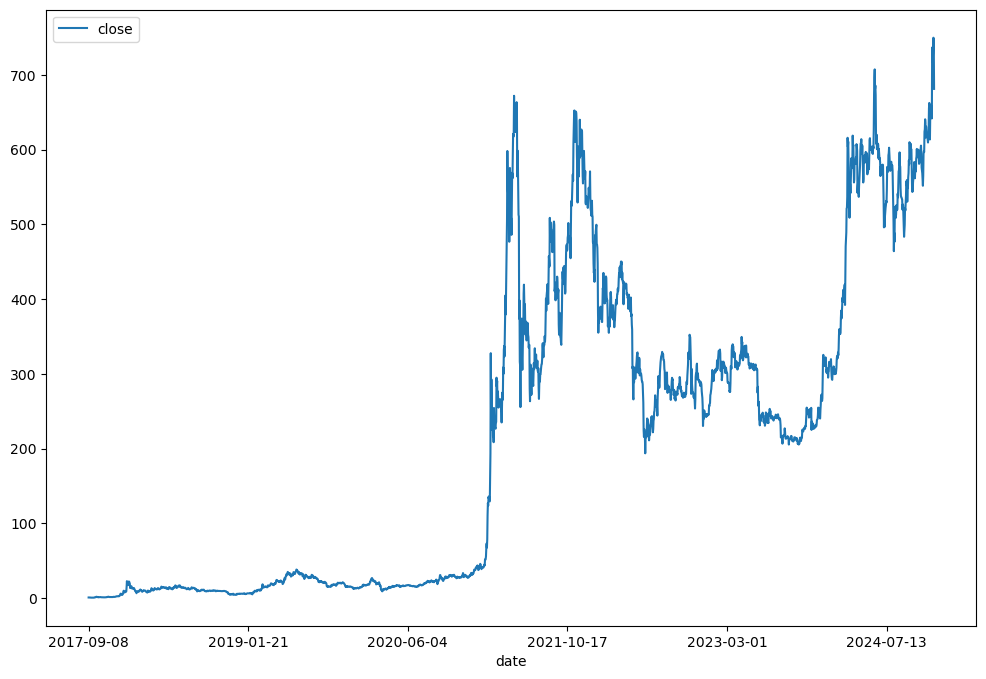

In [9]:
df.plot.line(y= "close", use_index=True, figsize = (12,8))

The closing price increased drastically in the year 2020, fell in the following year and gained its highest peak in the year 2024

## Feature Engineering

In [10]:
# Create a new column to show the closing price of the next day
df["tomorrow"] = df["close"].shift(-1)

In [11]:
# Create a new column to show whether the closing price increased or not 
df["target"] = (df["tomorrow"] > df["close"]).astype(int)

## Modelling

In [12]:
# Loading the modelling libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
x = df.drop(["tomorrow", "target"], axis=1)
y = df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
smote = SMOTE(random_state=42)
x_train, y_train= smote.fit_resample(x_train, y_train)

### Model 1:  Decision Tree

In [15]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

# Evaluation metrics
cm_dt = confusion_matrix(y_test, y_pred_dt)
acc_dt = accuracy_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {acc_dt},Confusion Matrix: {cm_dt}")

Decision Tree Accuracy: 0.49433962264150944,Confusion Matrix: [[131 142]
 [126 131]]


### Model 2: Random Forest

In [16]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

# Evaluation metrics
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f"Decision Tree Accuracy: {acc_rf},Confusion Matrix: {cm_rf}")

Decision Tree Accuracy: 0.5018867924528302,Confusion Matrix: [[135 138]
 [126 131]]


### Model 3: Xgboost Classifier

In [17]:
xg_model = XGBClassifier(random_state=42)
xg_model.fit(x_train, y_train)
y_pred_xg = xg_model.predict(x_test)

# Evaluation metrics
cm_xg = confusion_matrix(y_test, y_pred_xg)
acc_xg = accuracy_score(y_test, y_pred_xg)

print(f"Decision Tree Accuracy: {acc_xg},Confusion Matrix: {cm_xg}")

Decision Tree Accuracy: 0.5226415094339623,Confusion Matrix: [[145 128]
 [125 132]]


### Model 4: lgbmClassifier

In [18]:
lg_model = LGBMClassifier(random_state=42)
lg_model.fit(x_train, y_train)
y_pred_lg = lg_model.predict(x_test)

# Evaluation metrics
cm_lg = confusion_matrix(y_test, y_pred_lg)
acc_lg = accuracy_score(y_test, y_pred_lg)

print(f"Decision Tree Accuracy: {acc_lg},Confusion Matrix: {cm_lg}")

[LightGBM] [Info] Number of positive: 1094, number of negative: 1094
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1020
[LightGBM] [Info] Number of data points in the train set: 2188, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Decision Tree Accuracy: 0.5037735849056604,Confusion Matrix: [[137 136]
 [127 130]]


### Model 5: Deep Neural Networks

In [19]:
# Define the model architecture
dnn_model = Sequential()
dnn_model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
dnn_model.add(Dense(32, activation='relu'))
dnn_model.add(Dense(1, activation='softmax'))

# Compile the model
dnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
dnn_model.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, acc_dnn = dnn_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {acc_dnn:.4f}")

Epoch 1/50


c:\Users\Dave\anaconda3\envs\learn-env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Dave\anaconda3\envs\learn-env\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Dave\anaconda3\envs\learn-env\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  ret

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4710 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 2/50
 1/18 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5312 - loss: 0.0000e+00

c:\Users\Dave\anaconda3\envs\learn-env\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Dave\anaconda3\envs\learn-env\Lib\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4947 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4895 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5174 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5132 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4935 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4846 - loss: 0.0000e+00 - val_accuracy: 0.4849 - val_loss: 0.0000e+00
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - lo

### Hyperparameter Tuning: XgBoost Classifier

In [20]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],  # Smaller learning rates for volatile data
    'max_depth': [3, 5, 7, 10],  # Control complexity
    #'n_estimators': [100, 200, 500],  # More trees for better performance
    #'subsample': [0.6, 0.8, 1.0],  # Reduce overfitting
    ##'colsample_bytree': [0.6, 0.8, 1.0],  # Feature sampling
    'min_child_weight': [1, 5, 10],  # Handle imbalanced data
    'gamma': [0, 0.1, 0.3, 5],  # Regularization for splitting
    #'scale_pos_weight': [1, 5, 10]  # Adjust for class imbalance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xg_model,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=3,  # 3-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Fit the model
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
acc_xg_hyper = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {acc_xg_hyper:.4f}")

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1}
Test Accuracy: 0.5075


## Model Evaluation

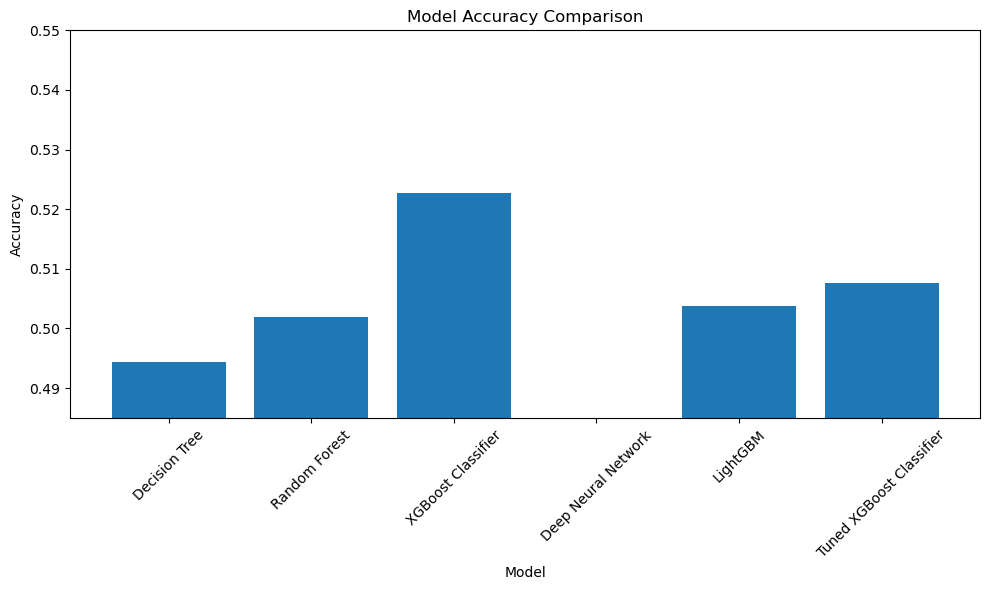

In [21]:
import matplotlib.pyplot as plt

# Define the accuracy of each model
model_accuracy = {
    'Decision Tree': acc_dt,
    'Random Forest': acc_rf,
    'XGBoost Classifier': acc_xg,
    'Deep Neural Network': acc_dnn,
    'LightGBM': acc_lg,
    'Tuned XGBoost Classifier': acc_xg_hyper
}

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_accuracy.keys(), model_accuracy.values())

# Set the title and labels
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Set the lower limit of the y-axis
min_value = min(model_accuracy.values())
plt.ylim(min_value, 0.55)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Conclusion and Recommendations

The tuned XGBoost model performed worse than the baseline, achieving a lower accuracy. This suggests that the hyperparameter adjustments may not align with the data’s underlying patterns or that the baseline settings captured the problem's structure more effectively.

### Ways to Improve:
1. **Reassess Hyperparameter Tuning**:
   - Broaden the search space and use techniques like Bayesian Optimization for finer adjustments.
   - Verify that tuning metrics align with the project goal.

2. **Enhance Feature Engineering**:
   - Add meaningful features like technical indicators or time-series patterns.
   - Remove irrelevant or redundant features.

3. **Optimize Data Preprocessing**:
   - Address potential class imbalance with oversampling, undersampling, or class weights.
   - Ensure features are scaled or transformed appropriately.

4. **Experiment with Alternative Models**:
   - Try LightGBM, CatBoost, or ensemble methods to compare results.

5. **Revisit Baseline Assumptions**:
   - Validate the baseline model to ensure it uses all available features effectively.

Iterative experimentation and deeper data exploration may help uncover the optimal setup for better performance.